# Plotting a histogram with matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)
rc('font', family='serif')

We will work with the same mortgage data we have been working with in the pandas tutorials.

In [2]:
data = pd.read_csv('../data/loan_data_subset.csv')
data.head()

,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s,applicant_race_1,applicant_race_name_1,...,property_type_name,purchaser_type,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
0,1,Loan originated,2,FRS,Federal Reserve System,3,"Information not provided by applicant in mail,...",36.0,6,"Information not provided by applicant in mail,...",...,One-to-four family dwelling (other than manufa...,2,Ginnie Mae (GNMA),79600.0,85,671.0,541.0,17.190001,1664.0,78.669998
1,1,Loan originated,5,NCUA,National Credit Union Administration,2,Not Hispanic or Latino,10.0,5,White,...,One-to-four family dwelling (other than manufa...,0,Loan was not originated or was not sold in cal...,88300.0,22,1402.0,1305.0,6.630000,3726.0,105.410004
2,4,Application withdrawn by applicant,9,CFPB,Consumer Financial Protection Bureau,1,Hispanic or Latino,28.0,5,White,...,One-to-four family dwelling (other than manufa...,0,Loan was not originated or was not sold in cal...,67000.0,119,1819.0,1542.0,24.240000,6979.0,89.099998
3,3,Application denied by financial institution,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,21.0,5,White,...,One-to-four family dwelling (other than manufa...,0,Loan was not originated or was not sold in cal...,53700.0,39,1239.0,922.0,24.930000,2896.0,80.000000
4,1,Loan originated,2,FRS,Federal Reserve System,2,Not Hispanic or Latino,87.0,5,White,...,One-to-four family dwelling (other than manufa...,3,Freddie Mac (FHLMC),67000.0,195,2908.0,2537.0,5.540000,8083.0,123.519997


#### Let's make a histogram of the loan amounts `loan_amount_000s`

In [3]:
loan_1000usd = data['loan_amount_000s']

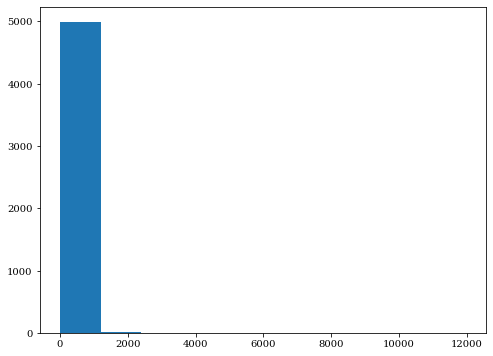

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(loan_1000usd);

Ok, this looks bad... how can we improve it?

### y-axis in log?

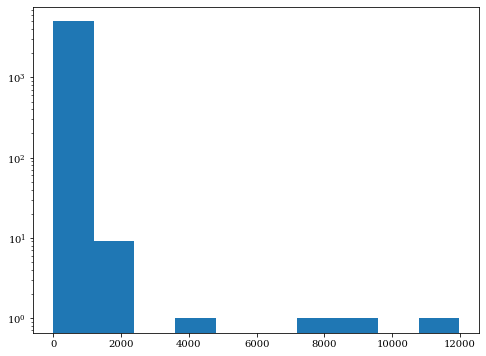

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(loan_1000usd);
ax.set_yscale('log')

ahh, annoying outliers...

### Rebin? which method? 

We can try `fd` which is robust to outliers 

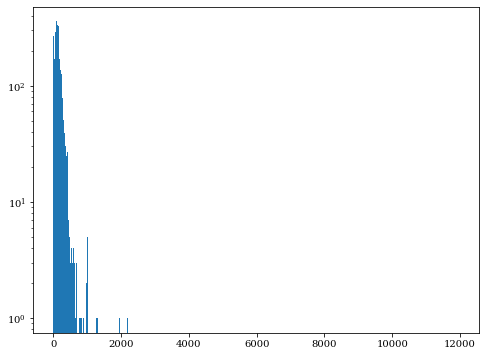

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(loan_1000usd, bins='fd')
ax.set_yscale('log')

better, but hard to see, what else?

### x-axis in log?

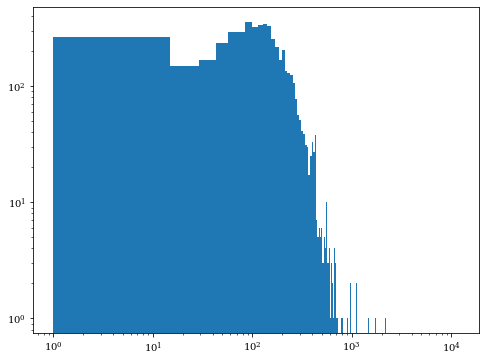

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(loan_1000usd, bins='fd')
ax.set_yscale('log')
ax.set_xscale('log')

What went wrong?

We binned (with constant bin size) in linear space, but visualized in log-space. How can we fix it?

### histogram of $\log_{10}$ of `loan_amount_000s`?
(and removing the log-scaling of both axes)

In [8]:
log_loan_1000usd = np.log10(data['loan_amount_000s'])

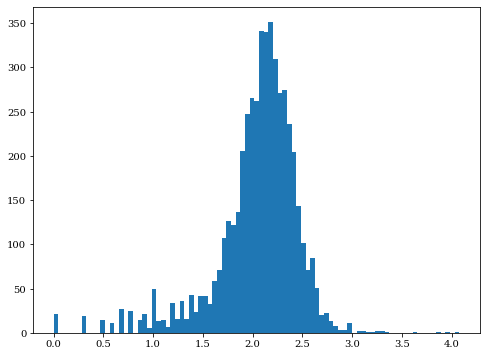

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(log_loan_1000usd, bins='fd');

Much better! **However** we have a big issue now: the values of the x-axis are difficult to interpret for a general audience (i.e., not easy to quickly think what loan amount a log value of 1.5 corresponds to).

What should we do?

Well, we can it multiple ways:
- The bad way: replace the tick labels by what those numbers correspond in exponential of log (linear) space. This is bad, as while the **ticks** will appear linearly spaced and have linear values, they are in face logarithmic, so your values will look something like 10, 31.62, 100, 316.23, etc.

- The painful way: remove all ticks and replace them manually with correct ticks.

- The easy way: calculate bins and bin edges in log space, but use their exponential for creating the histogram.

### histogram of loans in log-space

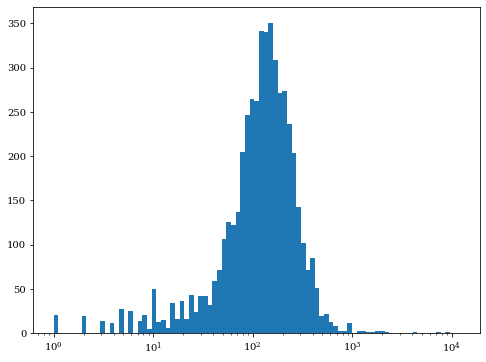

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Numpy histogram command only creates bins and bin values, not anything visual
_, log_bin_edges = np.histogram(log_loan_1000usd,bins='fd')

ax.hist(loan_1000usd,bins=10**log_bin_edges);
ax.set_xscale('log')

That's better. However, again, depending on the audience, scientific notation can be hard to see or interpret, let's replace them with plain numbers (also let's apply other cosmetic stuff).

### Cosmetics

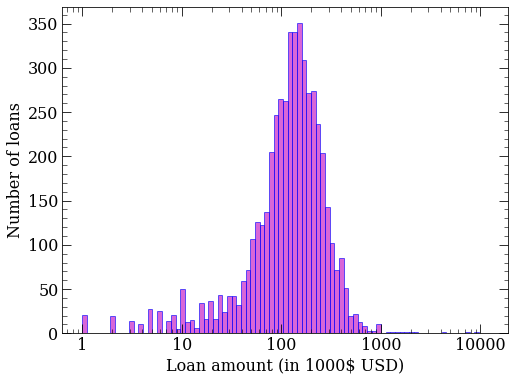

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Numpy histogram command only creates bins and bin values, not anything visual
_, log_bin_edges = np.histogram(log_loan_1000usd,bins='fd')

ax.hist(loan_1000usd,bins=10**log_bin_edges,color='m',alpha=0.6,edgecolor='b');
ax.set_xscale('log')
ax.set_xlabel('Loan amount (in 1000$ USD)',fontsize=16)
ax.set_ylabel('Number of loans',fontsize=16)

ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=9)
ax.tick_params(axis='both', which='minor', length=4.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)